CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [64]:
#!pip install tensorflow

In [65]:
#cifar pretrained model
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import cv2

In [66]:
#load inbuilt dataset cifar10
#defined in tensorflow.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test)=tensorflow.keras.datasets.cifar10.load_data()

In [67]:
#check data in training
#pixel size is 32,32
#3 for color channel
X_train.shape

(50000, 32, 32, 3)

In [68]:
#check data in testing
X_test.shape

(10000, 32, 32, 3)

In [69]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [70]:
np.min(Y_train)

0

In [71]:
np.max(Y_train)

9

In [72]:
#here total 10 category 

In [73]:
#to access first row means access first image and this matrix value show color intensity value
#in between 0 to 255 
#0 for white color and 255 for black color 
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [74]:
#Label class of first image
Y_train[0]

array([6], dtype=uint8)

In [75]:
#check type of training and testing data
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

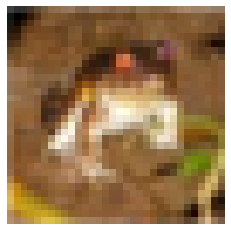

In [76]:
#to see images at 0 index
plt.imshow(X_train[0])
plt.axis('off')
plt.show() 

In [77]:
#cat is user defined list object
#the label classes in the dataset are:

#airplane 0
#automobile 1
#bird 2
#cat 3
#deer 4
#dog 5
#frog 6
#horse 7
#ship 8
#truck 9

In [78]:
#creat list of class labels
category=["airplane","automobile","bird","cat","deer","dog","frog",
          "horse","ship","truck"]
print(category)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [79]:
#to check cat with index
for i,v in enumerate(category):
  print(i,v)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [80]:
#Apply scalling for X_train and X_test input images
#scaling always on input
# Reduce pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0
# flatten the label values
Y_train, Y_test = Y_train.flatten(), Y_test.flatten()

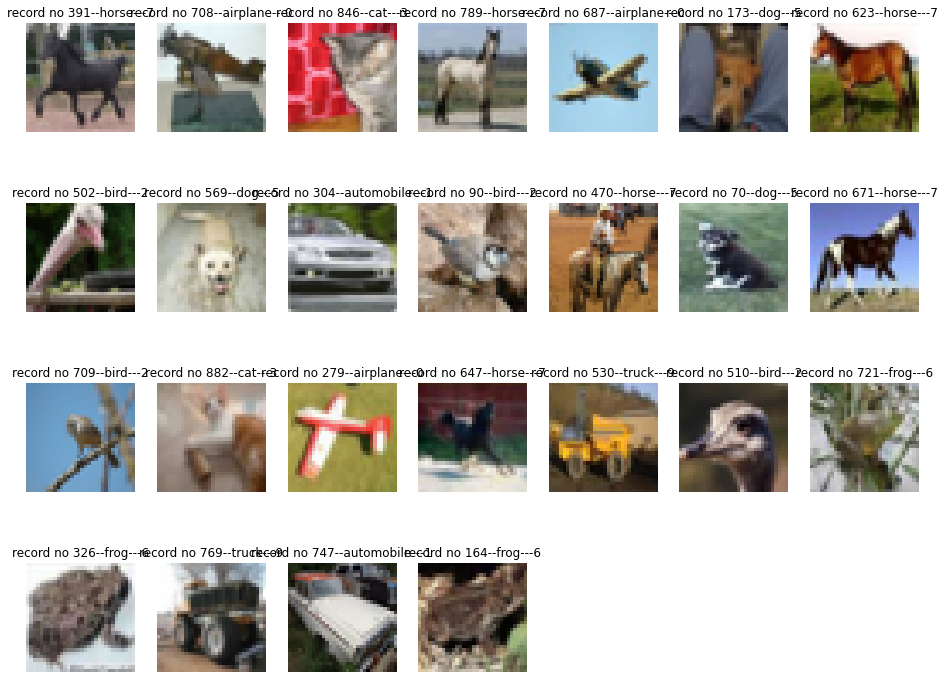

In [81]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,7,j);j=j+1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title("record no {}--{}---{}".format(i,category[Y_train[i]],Y_train[i]))

In [82]:
#to show first images
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [83]:
#compulsory :4 dimension input images required for training and then tetsing
#check dimension of X_train and X_test
print("Dimension of training data : ",X_train.ndim)

#to show shape of X_train
print("Shape of training data : ",X_train.shape)

Dimension of training data :  4
Shape of training data :  (50000, 32, 32, 3)


In [84]:
#check dimension of X_train and X_test
print("Dimension of testing data : ",X_test.ndim)

#to show shape of X_test
print("Shape of testing data : ",X_test.shape)

Dimension of testing data :  4
Shape of testing data :  (10000, 32, 32, 3)


In [85]:
#X_train , Y_train :50000 samples
#train with the help of CNN 
#and check model overfitting also
#split training data into 80% and 20% 
#80% means for training purpose and 20% means for validation purpose
#means check overfit the model in each iteration(epochs)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,
                                             random_state=1)

In [87]:
X_train.shape,X_val.shape
#40000 training data
#10000 validation data

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [88]:
#perform the model :Model Building with CNN(Convolutional neural network)
#create object of Sequential Class 
#Conv2D convrt to gray scale this is Convolutional layer
#32 feature primptive feature
#kernal=for matrix size 
#padding use for avoid overlapping
#strides means shiffting 
#maxpooling shrink images 2 by 2
#Flatten means convert to 1D

In [89]:
#Perform the model : Model Building with CNN (Convolutional neural network)
#create object of Sequential class 
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),
                    padding='valid',activation='relu',input_shape=[32,32,3]),
                tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                tensorflow.keras.layers.Flatten(),
  tensorflow.keras.layers.Dense(units=64,activation='relu'),#hidden layer
  tensorflow.keras.layers.Dense(units=128,activation='relu'),#hidden layer
  tensorflow.keras.layers.Dense(units=10,activation='softmax') #output layer
])

In [90]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
#create a procedure for early stopping
#call inbuilt class: EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#create the object of EarlyStopping class
cb=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
    )

In [92]:
#train the model 
train_model=model.fit(X_train,Y_train,batch_size=512,epochs=5000,callbacks=cb,
          validation_data=(X_val,Y_val))

Epoch 1/5000
79/79 [==============================] - 4s 30ms/step - loss: 1.8095 - accuracy: 0.3435 - val_loss: 1.5835 - val_accuracy: 0.4375
Epoch 2/5000
79/79 [==============================] - 2s 23ms/step - loss: 1.4412 - accuracy: 0.4873 - val_loss: 1.4001 - val_accuracy: 0.4958
Epoch 3/5000
79/79 [==============================] - 2s 26ms/step - loss: 1.2707 - accuracy: 0.5518 - val_loss: 1.2278 - val_accuracy: 0.5657
Epoch 4/5000
79/79 [==============================] - 2s 26ms/step - loss: 1.1759 - accuracy: 0.5839 - val_loss: 1.2103 - val_accuracy: 0.5671
Epoch 5/5000
79/79 [==============================] - 2s 23ms/step - loss: 1.1085 - accuracy: 0.6120 - val_loss: 1.1520 - val_accuracy: 0.5993
Epoch 6/5000
79/79 [==============================] - 2s 23ms/step - loss: 1.0318 - accuracy: 0.6423 - val_loss: 1.0979 - val_accuracy: 0.6188
Epoch 7/5000
79/79 [==============================] - 2s 23ms/step - loss: 0.9901 - accuracy: 0.6560 - val_loss: 1.1437 - val_accuracy: 0.5986

In [93]:
#evaluate training score and loss
model.evaluate(X_train,Y_train)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.2647 - accuracy: 0.9160


[0.2647358179092407, 0.9160249829292297]

In [94]:
#evaluate val score and loss
model.evaluate(X_val,Y_val)
#so here training score > testing score
#model is undefit

313/313 [==============================] - 1s 3ms/step - loss: 1.2851 - accuracy: 0.6622


[1.285083293914795, 0.6621999740600586]

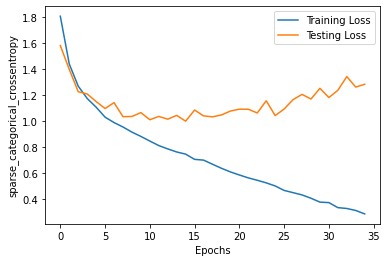

In [95]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model.history['loss'],label="Training Loss")
plt.plot(train_model.history['val_loss'],label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("sparse_categorical_crossentropy")
plt.legend()
plt.show()

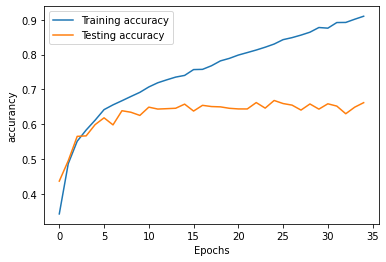

In [96]:
#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model.history['accuracy'],label="Training accuracy")
plt.plot(train_model.history['val_accuracy'],label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

In [97]:
#test the model with 30% data
Y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 1s 2ms/step


In [98]:
Y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.  , ..., 0.  , 0.98, 0.  ],
       [0.65, 0.  , 0.  , ..., 0.  , 0.34, 0.  ],
       ...,
       [0.  , 0.  , 0.83, ..., 0.01, 0.  , 0.  ],
       [0.31, 0.13, 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.99, 0.  , 0.  ]], dtype=float32)

In [99]:
#list comprehension
Y_pred=[np.argmax(i) for i in Y_pred]
Y_pred

[3,
 8,
 0,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 3,
 3,
 8,
 6,
 7,
 0,
 0,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 3,
 4,
 2,
 3,
 9,
 9,
 5,
 9,
 9,
 5,
 4,
 6,
 3,
 4,
 0,
 9,
 3,
 3,
 7,
 2,
 9,
 8,
 2,
 3,
 0,
 8,
 7,
 8,
 5,
 3,
 7,
 3,
 3,
 3,
 6,
 2,
 8,
 2,
 3,
 7,
 3,
 6,
 8,
 8,
 9,
 2,
 0,
 3,
 5,
 8,
 8,
 1,
 1,
 3,
 2,
 7,
 4,
 0,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 9,
 7,
 0,
 4,
 3,
 5,
 0,
 5,
 1,
 2,
 9,
 0,
 0,
 3,
 3,
 2,
 4,
 9,
 9,
 9,
 1,
 2,
 9,
 7,
 4,
 8,
 4,
 5,
 3,
 5,
 8,
 4,
 3,
 6,
 5,
 5,
 8,
 9,
 6,
 0,
 3,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 3,
 6,
 0,
 7,
 8,
 4,
 5,
 0,
 9,
 0,
 0,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 6,
 2,
 0,
 8,
 6,
 3,
 3,
 8,
 3,
 3,
 0,
 1,
 7,
 6,
 8,
 3,
 3,
 3,
 3,
 0,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 9,
 5,
 9,
 0,
 0,
 0,
 9,
 0,
 7,
 7,
 3,
 9,
 3,
 3,
 9,
 7,
 2,
 3,
 2,
 5,
 1,
 7,
 1,
 8,
 0,
 4,
 9,
 3,
 5,
 1,
 9,
 1,
 9,
 0,
 3,
 9,
 8,
 2,
 0,


In [100]:
#cat
class1=[category[i] for i in Y_pred]
class1

['cat',
 'ship',
 'airplane',
 'ship',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'cat',
 'cat',
 'ship',
 'frog',
 'horse',
 'airplane',
 'airplane',
 'truck',
 'deer',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'cat',
 'deer',
 'bird',
 'cat',
 'truck',
 'truck',
 'dog',
 'truck',
 'truck',
 'dog',
 'deer',
 'frog',
 'cat',
 'deer',
 'airplane',
 'truck',
 'cat',
 'cat',
 'horse',
 'bird',
 'truck',
 'ship',
 'bird',
 'cat',
 'airplane',
 'ship',
 'horse',
 'ship',
 'dog',
 'cat',
 'horse',
 'cat',
 'cat',
 'cat',
 'frog',
 'bird',
 'ship',
 'bird',
 'cat',
 'horse',
 'cat',
 'frog',
 'ship',
 'ship',
 'truck',
 'bird',
 'airplane',
 'cat',
 'dog',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'cat',
 'bird',
 'horse',
 'deer',
 'airplane',
 'truck',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'frog',
 'ca

In [101]:
#to genrate report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#f1 score check

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      1000
           1       0.83      0.68      0.75      1000
           2       0.61      0.43      0.51      1000
           3       0.40      0.61      0.48      1000
           4       0.57      0.60      0.58      1000
           5       0.57      0.50      0.54      1000
           6       0.80      0.66      0.72      1000
           7       0.73      0.67      0.70      1000
           8       0.82      0.72      0.77      1000
           9       0.70      0.76      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.65     10000
weighted avg       0.66      0.64      0.65     10000

[[782  14  33  31  21   9   7   8  52  43]
 [ 65 681   3  30   8   7   5  10  30 161]
 [107   6 434 142 114  84  45  44  13  11]
 [ 34   6  37 609  73 126  51  35   8  21]
 [ 41   6  74 127 597  44  40  60   7   4]
 [ 31   2  50 288  52 502 

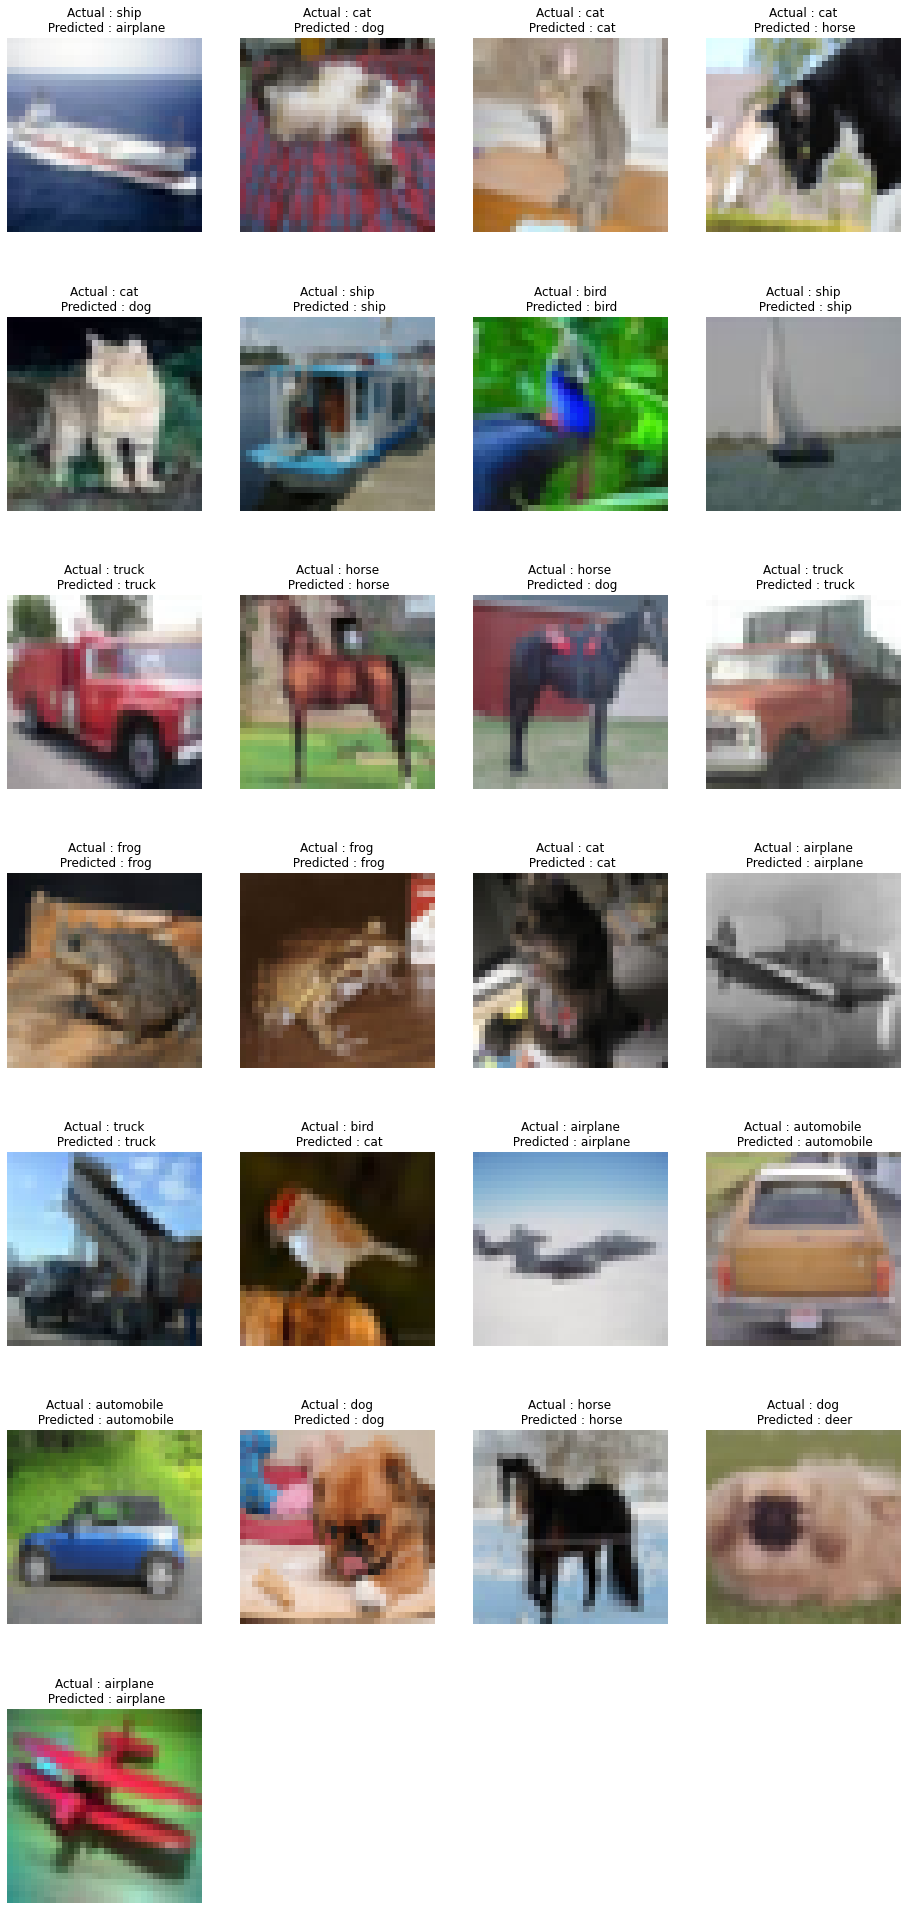

In [102]:
#to Show 25 images randomly from first 1000 images
plt.figure(figsize=(16,35))
j=1
for i in np.random.randint(0,1000,25):

  plt.subplot(7,4,j);j=j+1
  plt.imshow(X_test[i].reshape(32,32,3))#
  plt.axis('off')
  plt.title("Actual : {}\n Predicted : {}".
            format(category[Y_test[i]],category[Y_pred[i]]))

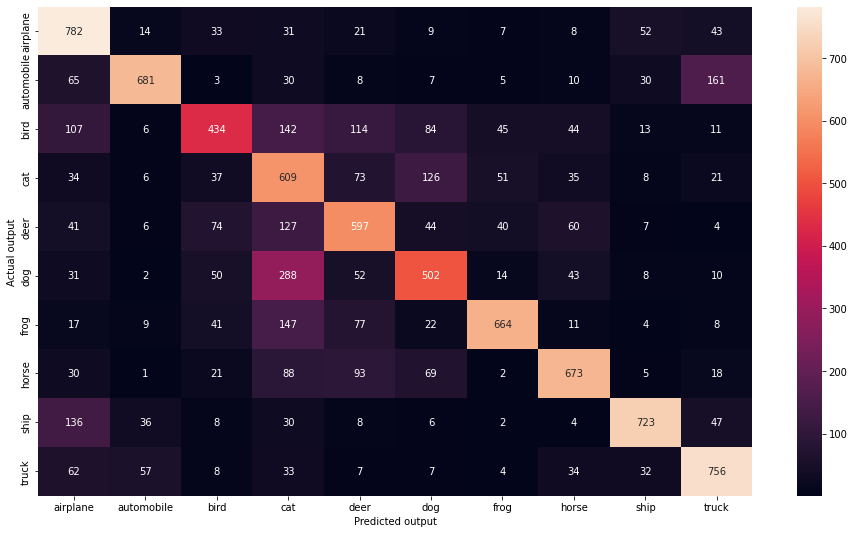

In [103]:
#create confusion matrix in visualization form
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(16,9))
sb.heatmap(cm,annot=True,fmt="d",xticklabels=category,yticklabels=category)#fmt="d" fmt int 
#fmt means format and  d means int
plt.xlabel("Predicted output")
plt.ylabel("Actual output")
plt.show()

In [104]:
#Perform the model : Model Building with CNN (Convolutional neural network)
#create object of Sequential class 
#use regularizers and dropout overfitting and underfitting techniques
from tensorflow.keras import regularizers
model1=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),
                    padding='valid',activation='relu',input_shape=[32,32,3]),
                tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                tensorflow.keras.layers.Flatten(),
  tensorflow.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),#hidden layer
  tensorflow.keras.layers.Dense(units=128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),#hidden layer
  tensorflow.keras.layers.Dense(units=10,activation='softmax') #output layer
])

In [105]:
#compile the model
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
#train the model 
train_model1=model1.fit(X_train,Y_train,batch_size=512,epochs=5000,callbacks=cb,
          validation_data=(X_val,Y_val))

Epoch 1/5000
79/79 [==============================] - 4s 35ms/step - loss: 2.8143 - accuracy: 0.2039 - val_loss: 2.1795 - val_accuracy: 0.3638
Epoch 2/5000
79/79 [==============================] - 2s 24ms/step - loss: 2.0845 - accuracy: 0.3155 - val_loss: 1.8482 - val_accuracy: 0.4280
Epoch 3/5000
79/79 [==============================] - 2s 24ms/step - loss: 1.9016 - accuracy: 0.3665 - val_loss: 1.8310 - val_accuracy: 0.3955
Epoch 4/5000
79/79 [==============================] - 2s 27ms/step - loss: 1.8267 - accuracy: 0.3934 - val_loss: 1.6957 - val_accuracy: 0.4521
Epoch 5/5000
79/79 [==============================] - 2s 26ms/step - loss: 1.7893 - accuracy: 0.4048 - val_loss: 1.6575 - val_accuracy: 0.4686
Epoch 6/5000
79/79 [==============================] - 2s 26ms/step - loss: 1.7524 - accuracy: 0.4173 - val_loss: 1.6896 - val_accuracy: 0.4535
Epoch 7/5000
79/79 [==============================] - 2s 25ms/step - loss: 1.7271 - accuracy: 0.4273 - val_loss: 1.6293 - val_accuracy: 0.4783

In [107]:
#model evaluation
print("Trainig loss and accurancy : ",model1.evaluate(X_train,Y_train))
print("Testing loss and accurancy : ",model1.evaluate(X_test,Y_test))
#training score > testing score
#model is underfit

1250/1250 [==============================] - 4s 3ms/step - loss: 1.0125 - accuracy: 0.7316
Trainig loss and accurancy :  [1.0125459432601929, 0.7316499948501587]
313/313 [==============================] - 1s 3ms/step - loss: 1.2435 - accuracy: 0.6442
Testing loss and accurancy :  [1.2434855699539185, 0.6442000269889832]


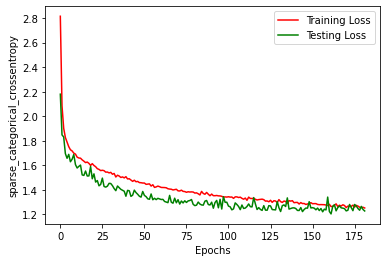

In [108]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model1.history['loss'],label="Training Loss",color='red')
plt.plot(train_model1.history['val_loss'],label="Testing Loss",color='green')
plt.xlabel("Epochs")
plt.ylabel("sparse_categorical_crossentropy")
plt.legend()
plt.show()

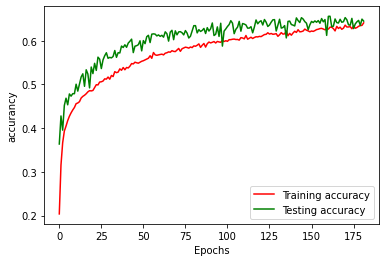

In [109]:
#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model1.history['accuracy'],label="Training accuracy",color='red')
plt.plot(train_model1.history['val_accuracy'],label="Testing accuracy",color='green')
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

Conclusion:
Here training score > testing score 
applying pruning technique like regularizers and dropout
But score slightly change
so model is underfit 